In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
from shapely.geometry import Point


In [16]:
df = pd.read_csv(r'../../data/derived/Pleiades_df.csv')
roman_df = df[df['Title'].str.lower().str.contains('roman ')]
roman_df = roman_df[roman_df['Start_Date']<500.0] ### No roman places are created after 500 AD
roman_settlements = roman_df[roman_df['Place_Type'].str.lower().str.contains('settlement')]

Roman empire spans from around 30 BC to 480 AD with its height around 117 AD where it controlled all land from western europe to the middle east, one idea is to show how the 'tagged Roman' structures correlate with this information. Below I will try to plot the number of tagged places from 30 bc to 480AD

In [14]:
dates = np.arange(-30,480, 10)
no_roman_places = np.zeros_like(dates)
for i, date in enumerate(dates):
    no_roman_places[i] = len(roman_df[(roman_df['Start_Date']<=date) & (roman_df['End_Date']>=date)])


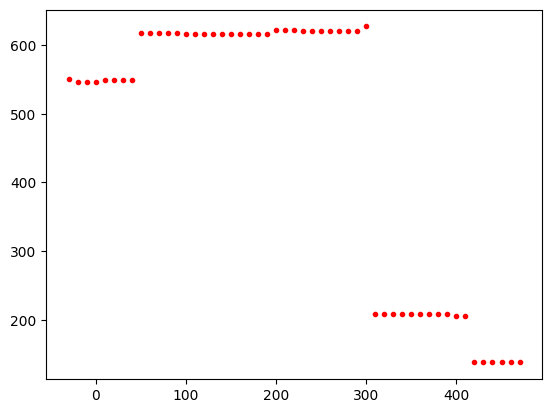

In [15]:
plt.plot(dates, no_roman_places, 'r.')

In [26]:
lons_117AD = roman_df[(roman_df['Start_Date']<=117) & (roman_df['End_Date']>=117)]['long']
lats_117AD = roman_df[(roman_df['Start_Date']<=117) & (roman_df['End_Date']>=117)]['lat']
lons_480AD = roman_df[(roman_df['Start_Date']<=480) & (roman_df['End_Date']>=480)]['long']
lats_480AD = roman_df[(roman_df['Start_Date']<=480) & (roman_df['End_Date']>=480)]['lat']

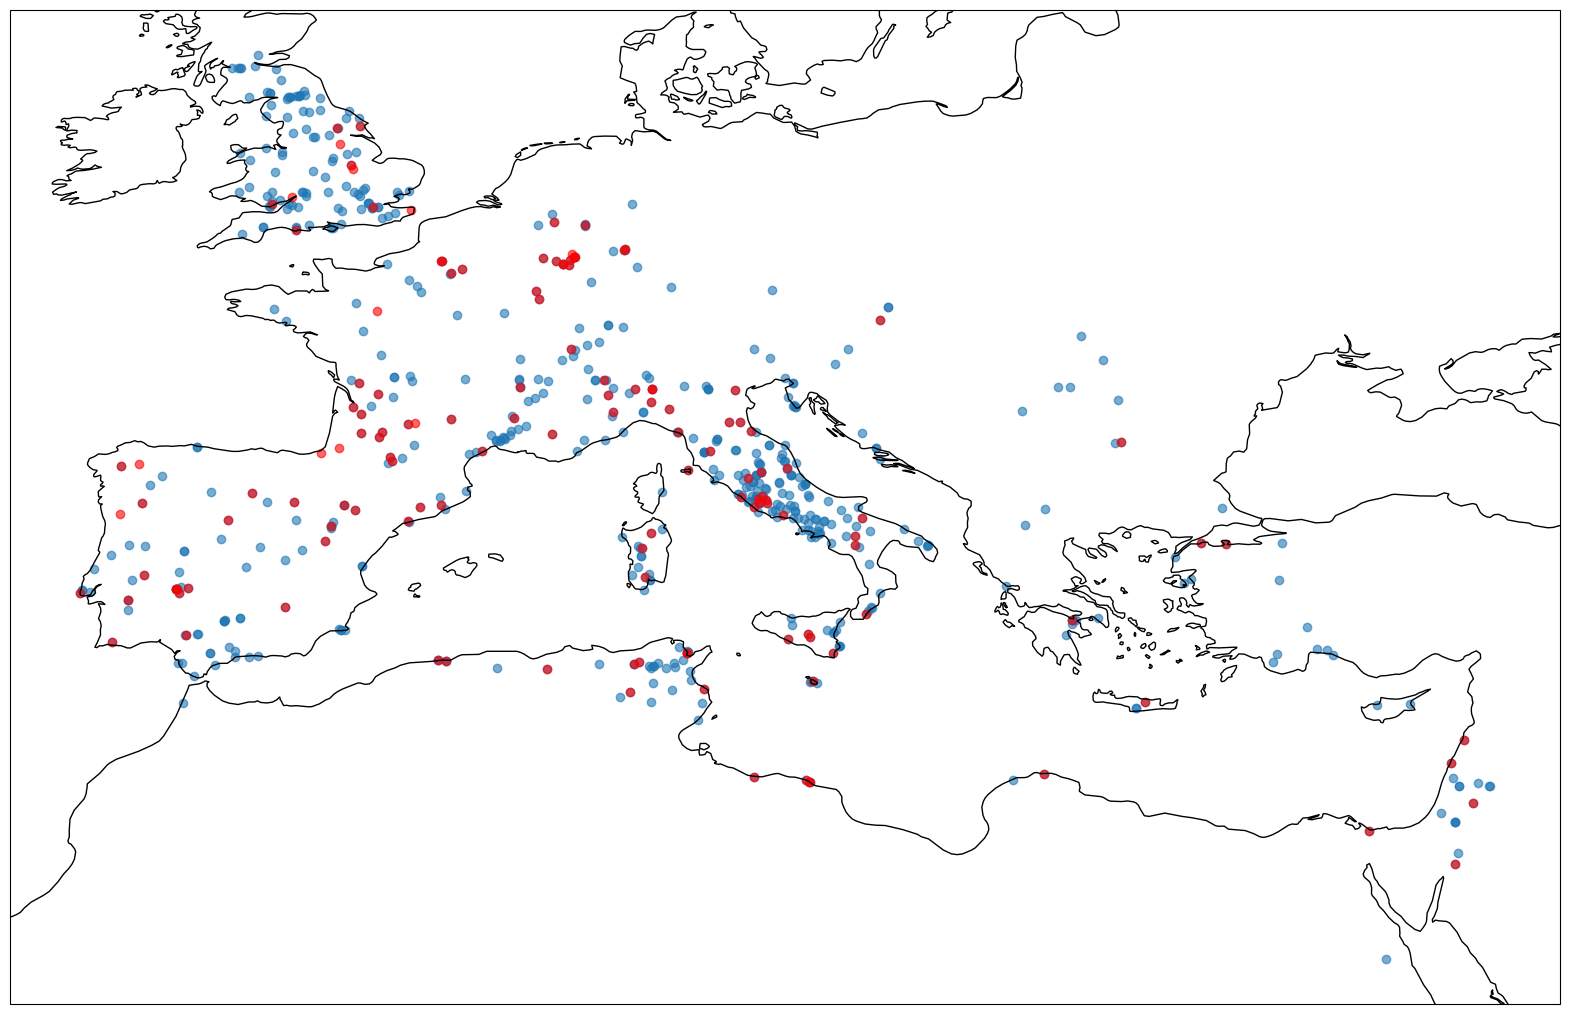

In [34]:
# Create a new figure with a Mercator projection
plt.figure(figsize=(20, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines
# ax.stock_img()
ax.coastlines()

sc = ax.scatter(lons_117AD, lats_117AD ,transform=ccrs.PlateCarree(), alpha = 0.6)
sc = ax.scatter(lons_480AD, lats_480AD ,transform=ccrs.PlateCarree(),c = 'r', alpha = 0.6)



# Show the plot
plt.show()

### LOOK FOR OTHER MAP PACKAGES?
## Geopandas? 

In [49]:
geometry = [Point(lonlat) for lonlat in zip(roman_df['long'], roman_df['lat'])]
roman_gdf = gpd.GeoDataFrame(roman_df, geometry=geometry, crs='EPSG:4326')

C:\Users\joeam\AppData\Local\Temp\ipykernel_11016\925547126.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ValueError: 'FFA39F' is not a valid color value.

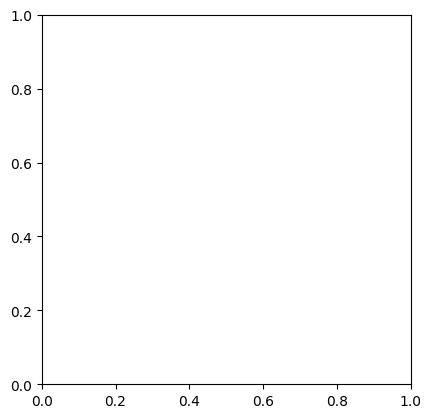

In [58]:
# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='FFA39F')
roman_gdf.plot(ax=ax, color='red', markersize=1)

# Get the bounding box of the GeoDataFrame
bbox = roman_gdf.total_bounds
plt.xlim(bbox[0] - 1, bbox[2] + 1)  # Adjust x-axis limits
plt.ylim(bbox[1] - 1, bbox[3] + 1)  # Adjust y-axis limits

plt.show()